In [1]:
import numpy as np

In [2]:
import doodler_forall as dd
import utils as u
# import model as m
import functions as f
import network as n


In [3]:
config = u.read_config('configs/config.yaml')

In [4]:
global_config, layers_config = u.adapt_config(config)

In [7]:
model = n.Network(global_config, layers_config)

|----------------------------------------|
| GLOBAL   |                             |
|----------------------------------------|
| loss     | cross_entropy               |
| lrate    | 0.001                       |
| wreg     | 0.1                         |
| wrt      | L2                          |
|----------------------------------------|
| LAYERS   |                             |
|----------------------------------------|
| input    | 20                          |
| layer 1  |                             |
|          | size: 50                    |
|          | act: sigmoid                |
|          | wr: glorot                  |
| layer 2  |                             |
|          | size: 70                    |
|          | act: relu                   |
|          | wr: glorot                  |
| layer 3  |                             |
|          | size: 30                    |
|          | act: relu                   |
|          | wr: glorot                  |
| layer 4  

In [40]:
f.loss[model.loss]

'cross_entropy'

In [9]:
dataset_name = 'dataset_2024-02-10_750_5_20'
training_set, testing_set, val_set = u.load_dataset(dataset_name)

In [10]:
X_train, y_train = training_set[0], training_set[1]
X_val, y_val = val_set[0], val_set[1]
X_test, y_test = testing_set[0], testing_set[1]

Epoch: 1,     loss: 1.709007751048892,  val loss: 1.6728881131613433


Epoch: 2,     loss: 1.7087603739214492, val loss: 1.6726131749060649
Epoch: 3,     loss: 1.7085110016174405, val loss: 1.6723329031843097
Epoch: 4,     loss: 1.7082631220130804, val loss: 1.6720617123803971
Epoch: 5,     loss: 1.7080091629190923, val loss: 1.6717883571075252
Epoch: 6,     loss: 1.7077690798794745, val loss: 1.6715251959817181
Epoch: 7,     loss: 1.7075540677754948, val loss: 1.6712718842055465
Epoch: 8,     loss: 1.7073503552058953, val loss: 1.6710376207386612
Epoch: 9,     loss: 1.7071532808021284, val loss: 1.6708093422511665
Epoch: 10,    loss: 1.7069711191205124, val loss: 1.670585980680878
Epoch: 11,    loss: 1.7067995701789582, val loss: 1.6703645895031314
Epoch: 12,    loss: 1.7066348841086842, val loss: 1.6701456830597945
Epoch: 13,    loss: 1.7064605649066564, val loss: 1.6699286569840772
Epoch: 14,    loss: 1.7061831517671424, val loss: 1.6696687265064565
Epoch: 15,    loss: 1.7059048385940916, val loss: 1.6694170585138441
Epoch: 16,    loss: 1.7056396418755

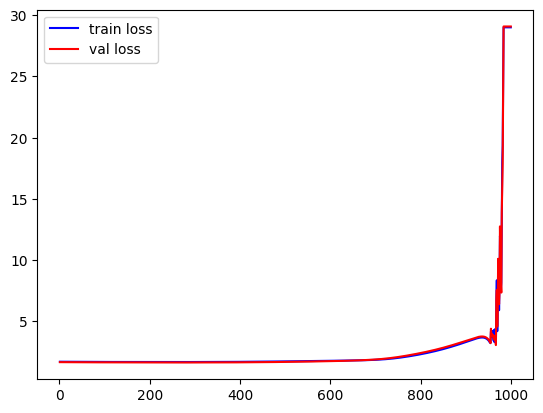

In [12]:
y_pred = model.fit(X_train, y_train, X_val, y_val, epoch=1000)

In [32]:
import tensorflow as tf

modelk = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 20)),
    tf.keras.layers.Dense(50, activation='sigmoid', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(70, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(5, activation='softmax')
])

modelk.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = modelk.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
2/2 [==============================] - 0s 69ms/step - loss: 1.6170 - accuracy: 0.1600 - val_loss: 1.6166 - val_accuracy: 0.2101
Epoch 2/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5734 - accuracy: 0.2800 - val_loss: 1.6069 - val_accuracy: 0.2101
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5607 - accuracy: 0.2800 - val_loss: 1.6023 - val_accuracy: 0.2087
Epoch 4/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5391 - accuracy: 0.2800 - val_loss: 1.6021 - val_accuracy: 0.2101
Epoch 5/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5227 - accuracy: 0.2800 - val_loss: 1.6053 - val_accuracy: 0.2101
Epoch 6/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5007 - accuracy: 0.2800 - val_loss: 1.6055 - val_accuracy: 0.2101
Epoch 7/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.4762 - accuracy: 0.2800 - val_loss: 1.6040 - val_accuracy: 0.2101
Epoch 8/1000


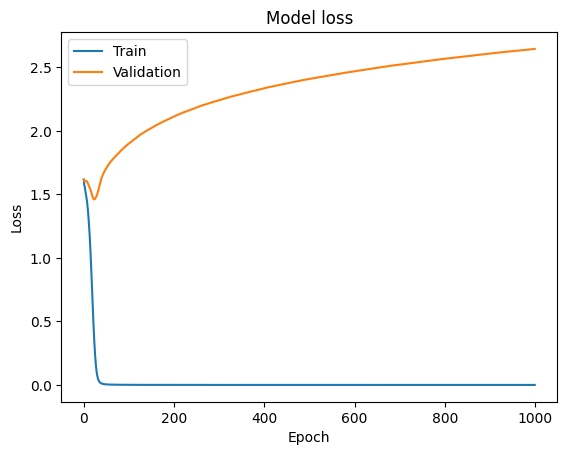

In [34]:
import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
modelk.weights

[<tf.Variable 'dense_4/kernel:0' shape=(400, 50) dtype=float32, numpy=
 array([[ 0.12432097,  0.01467554,  0.03655642, ...,  0.1396379 ,
         -0.07312009, -0.03484252],
        [-0.06497107,  0.13901442,  0.06355714, ...,  0.02257753,
         -0.02712917,  0.11272646],
        [ 0.02568282, -0.06544604, -0.09115283, ..., -0.06614253,
         -0.09975171,  0.01027122],
        ...,
        [-0.16739646, -0.05190785,  0.10038979, ...,  0.07629774,
          0.05483504,  0.01637842],
        [ 0.05516758,  0.01626192, -0.15662758, ..., -0.10529456,
          0.05208078,  0.02216835],
        [ 0.06123433, -0.14435065,  0.01550626, ...,  0.07341257,
          0.0135594 , -0.00185581]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(50,) dtype=float32, numpy=
 array([-0.02748707, -0.00087966,  0.01386172,  0.00770896,  0.00104224,
         0.03476958,  0.00262446,  0.01654747,  0.038135  ,  0.01037397,
         0.02028373,  0.00074964,  0.03007427, -0.0189819 , -0.01703399,
  

In [16]:
y_pred = model.forward_pass(X_train.reshape(-1, 20**2))
y_pred

array([[2.28830535e-35, 6.91645848e-50, 1.21741831e-18, 1.00000000e+00,
        6.93186412e-68],
       [5.38265613e-37, 3.70722151e-52, 1.88654624e-19, 1.00000000e+00,
        5.61320223e-71],
       [3.64623896e-37, 1.91064597e-52, 1.46197386e-19, 1.00000000e+00,
        2.38762435e-71],
       [3.78353540e-35, 1.40214207e-49, 1.86144226e-18, 1.00000000e+00,
        1.78801755e-67],
       [6.39894103e-38, 1.73908594e-53, 5.69864899e-20, 1.00000000e+00,
        8.80714185e-73],
       [6.15834605e-36, 1.10610651e-50, 6.18382469e-19, 1.00000000e+00,
        6.55749832e-69],
       [1.07096214e-37, 3.43945554e-53, 8.17339611e-20, 1.00000000e+00,
        2.12656486e-72],
       [1.80905548e-36, 1.87714724e-51, 3.23339403e-19, 1.00000000e+00,
        5.35050132e-70],
       [5.18157283e-37, 3.36860708e-52, 1.78933742e-19, 1.00000000e+00,
        4.99956191e-71],
       [5.61622263e-38, 1.41603784e-53, 5.63319779e-20, 1.00000000e+00,
        6.52990521e-73],
       [1.54781702e-38, 2.1562

In [17]:
dL = f.d_loss['cross_entropy'](y_train, y_pred)

In [18]:
model.layers[1].db

array([ 0.00000000e+00,  0.00000000e+00, -9.46462685e-05,  0.00000000e+00,
       -4.30476509e-05,  0.00000000e+00,  0.00000000e+00, -8.29313960e-05,
       -7.39077444e-05,  0.00000000e+00,  0.00000000e+00, -5.93751372e-06,
        0.00000000e+00, -5.89340561e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.16030363e-05, -5.52124278e-05,
        0.00000000e+00, -9.14631538e-05,  0.00000000e+00, -3.59995883e-05,
       -7.87348200e-05,  0.00000000e+00, -3.58624493e-06, -9.08702435e-05,
        0.00000000e+00, -1.02113564e-05, -9.45115106e-05,  0.00000000e+00,
        3.20584314e-25,  0.00000000e+00, -7.90881926e-06, -1.74614618e-21,
       -1.84098876e-04, -2.69558734e-05,  0.00000000e+00,  0.00000000e+00,
       -6.76451242e-05, -8.98870220e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.46797641e-05,  0.00000000e+00, -2.82478519e-05,
        0.00000000e+00, -6.59027098e-05, -1.41251818e-05,  0.00000000e+00,
        0.00000000e+00,  

In [19]:
model.layers[1].b

array([[ 0.00000000e+00, -1.22086405e-02,  3.64308672e-01,
         0.00000000e+00,  1.52676759e-01, -2.92554384e-02,
        -6.88829745e-04,  3.12283085e-01,  2.99844077e-01,
        -9.24735970e-03,  0.00000000e+00,  2.96243229e-02,
         0.00000000e+00,  1.99592431e-01, -5.40523974e-03,
         0.00000000e+00, -2.50110847e-02,  0.00000000e+00,
         5.64708423e-02,  2.13854046e-01,  0.00000000e+00,
         3.25977155e-01,  2.55121965e-03,  1.46047577e-01,
         2.94619787e-01, -4.10945422e-04,  1.50008968e-02,
         3.61998085e-01, -2.07057972e-03,  2.80788389e-02,
         3.73732718e-01,  3.42785608e-03, -1.38711652e-02,
        -1.78285097e-02,  4.34382422e-02, -7.68066890e-03,
         7.06192440e-01,  1.07698136e-01,  0.00000000e+00,
        -1.89017538e-02,  2.72622997e-01,  3.39829997e-01,
         0.00000000e+00,  0.00000000e+00, -1.21218046e-02,
         1.38046854e-01,  0.00000000e+00,  8.71045164e-02,
        -3.59114487e-03,  2.71591153e-01,  3.80768104e-0

In [20]:
np.max(np.abs(model.layers[1].W))

0.9829164877902139

In [21]:
model.layers[1].hlast.dot(model.layers[1].W) + model.layers[1].b

array([[-1.07820457, -0.23953921, 10.72186087, ..., -0.57118449,
         5.23173345, -0.6270702 ],
       [-1.16022664, -0.24056151, 11.15374731, ..., -0.47224499,
         5.51441841, -0.68372209],
       [-1.28205193, -0.17760917, 11.25648457, ..., -0.56919805,
         5.50128874, -0.60378641],
       ...,
       [-1.24447006, -0.20227667, 12.02619352, ..., -0.65056415,
         5.88635349, -0.65810375],
       [-1.10110085, -0.17948938, 10.55138645, ..., -0.46987297,
         5.0976336 , -0.55704095],
       [-1.22471493, -0.20493165, 11.22977999, ..., -0.5095149 ,
         5.4516399 , -0.66089225]])

In [23]:
model.layers[1].W

array([[-0.10861106, -0.13228338,  0.1502728 , ..., -0.14905374,
        -0.10718211, -0.2024454 ],
       [-0.04882011, -0.11920589,  0.13221231, ...,  0.11487111,
         0.05858603, -0.04857472],
       [-0.12122748,  0.17289536,  0.05985985, ..., -0.1890383 ,
         0.02161571,  0.15141296],
       ...,
       [-0.15824744,  0.10850783,  0.45985826, ..., -0.01748167,
         0.32268913,  0.16166671],
       [-0.04825201, -0.16503141,  0.05956645, ...,  0.04160618,
         0.32143569, -0.09306718],
       [ 0.07989677, -0.00168854,  0.33639642, ..., -0.16865625,
         0.30486689, -0.21073719]])

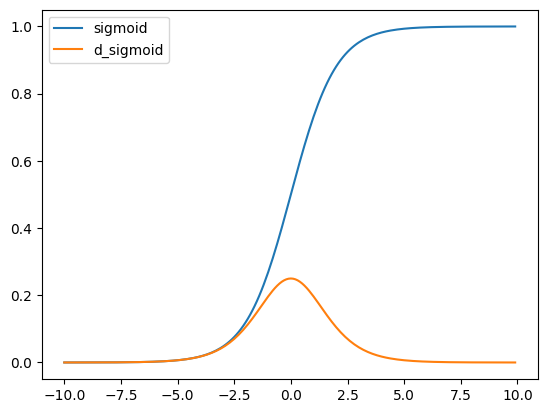

In [25]:
from matplotlib import pyplot as plt

x = np.arange(- 10, 10, .1)
s = f.sigmoid(x)
d_s = f.d_sigmoid(s)

plt.plot(x, s, label='sigmoid')
plt.plot(x, d_s, label='d_sigmoid')
plt.legend()

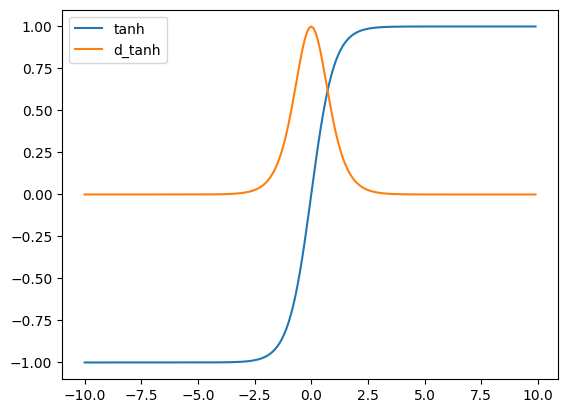

In [26]:
from matplotlib import pyplot as plt

x = np.arange(- 10, 10, .1)
s = f.tanh(x)
d_s = f.d_tanh(s)

plt.plot(x, s, label='tanh')
plt.plot(x, d_s, label='d_tanh')
plt.legend()

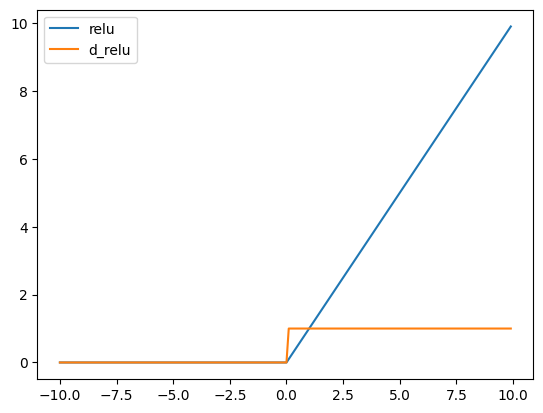

In [27]:
from matplotlib import pyplot as plt

x = np.arange(- 10, 10, .1)
s = f.relu(x)
d_s = f.d_relu(s)

plt.plot(x, s, label='relu')
plt.plot(x, d_s, label='d_relu')
plt.legend()

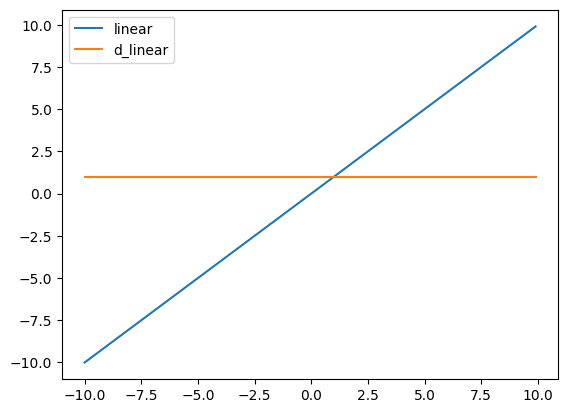

In [30]:
from matplotlib import pyplot as plt

x = np.arange(- 10, 10, .1)
s = f.linear(x)
d_s = f.d_linear(s)

plt.plot(x, s, label='linear')
plt.plot(x, d_s, label='d_linear')
plt.legend()